In [134]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [135]:
locations = ["C:\\Users\\George\\Documents\\Football Analytics\\Kanit.zip"]

In [136]:
font_files = font_manager.findSystemFonts(fontpaths=locations)

In [137]:
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [138]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system


In [139]:
player_name = 'Ryan Allsopp'
team_name = 'Hull City'
league_name = 'Championship'
player_id = '172284'
season_id = '2023/2024-48'

In [140]:
params = {
    'playerId': player_id,
    'seasonId': season_id,
}
response = requests.get('https://www.fotmob.com/api/playerStats',params=params)
data = response.json()

In [141]:
df = pd.DataFrame(data['keeperShotmap'])

In [142]:
team_color = df['teamColor'].unique()[0]

In [143]:
for x in range(len(df)):
    if df['situation'][x] == 'Penalty':
        df.drop(x, inplace=True)

In [144]:
df.dropna(subset=['expectedGoalsOnTarget'], inplace=True)

In [145]:
df.reset_index(drop=True, inplace=True)

In [146]:
pd.set_option('display.max_columns', None)
df = df[['eventType','expectedGoalsOnTarget','onGoalShot']]

In [147]:
df['x'] = df['onGoalShot'].apply(lambda d: d.get('x'))
df['y'] = df['onGoalShot'].apply(lambda d: d.get('y'))

In [148]:
df['isGoal'] = df['eventType'] == 'Goal'

In [149]:
matches = data['topStatCard']['items'][3]['statValue']

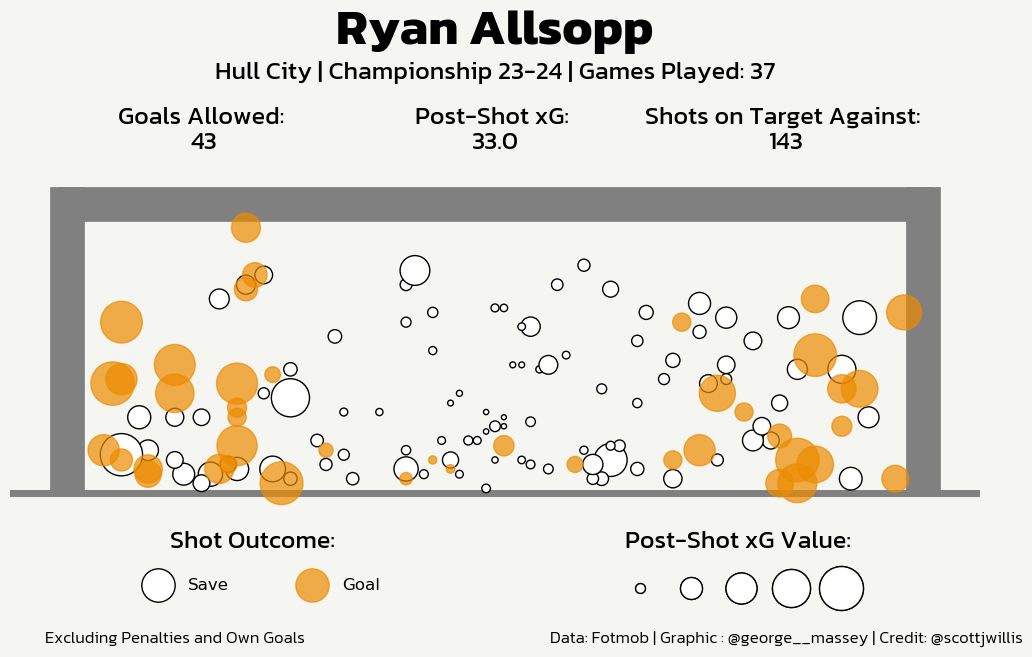

In [154]:
plt.figure(figsize=(10,10), tight_layout=True, facecolor='#F5F6F1')
plt.gca().set_facecolor('#F5F6F1')
#labels = df['isGoal'].map({True: 'Goal', False: 'Save'})
goals = df[df['isGoal'] == True].reset_index(drop=True)
saves = df[df['isGoal'] == False].reset_index(drop=True)
plt.scatter(saves['x'],saves['y'],s=saves['expectedGoalsOnTarget']*1000,alpha=1,c='white',edgecolors='black', zorder = 1)
plt.scatter(goals['x'],goals['y'],s=goals['expectedGoalsOnTarget']*1000,alpha=0.7,c=team_color,edgecolors=team_color, zorder = 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_xticks([])  # Remove x ticks
plt.gca().set_yticks([])  # Remove y ticks
plt.gca().set_xticklabels([])  # Remove x tick labels
plt.gca().set_yticklabels([])
plt.ylim(-0.1, 0.7)
plt.xlim(-0.1, 2.1)
plt.axhline(y=0.655, xmin=0.067, xmax=0.933,color='grey', linestyle='-', linewidth=25, zorder = 0)
plt.axhline(y=0, color='grey', linestyle='-', linewidth=5, zorder = 0)
plt.axvline(x=0.03, ymin=0.17, ymax=0.943, color='grey', linestyle='-', linewidth=25, zorder = 0)
plt.axvline(x=1.97, ymin=0.17, ymax=0.943, color='grey', linestyle='-', linewidth=25, zorder = 0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add title and statistics
plt.text(0.5,1.4, f"{player_name}", ha = 'center',fontsize=36, transform=plt.gca().transAxes, fontproperties=bold)
plt.text(0.5,1.3, f"{team_name} | {league_name} 23-24 | Games Played: {matches}", ha = 'center',fontsize=18, transform=plt.gca().transAxes, fontproperties=regular)
plt.text(0.2, 1.1, f"Goals Allowed: \n{df['isGoal'].sum()}", fontsize=18, ha = 'center',transform=plt.gca().transAxes, fontproperties=regular)
plt.text(0.5, 1.1, f"Post-Shot xG: \n{df['expectedGoalsOnTarget'].sum():.1f}", fontsize=18, ha = 'center',transform=plt.gca().transAxes, fontproperties=regular)
plt.text(0.8, 1.1, f"Shots on Target Against: \n{len(df)}", fontsize=18, ha = 'center',transform=plt.gca().transAxes, fontproperties=regular)

# Add legend
handle_save = plt.scatter([], [], c='white', edgecolors='black', label='Save')
handle_goal = plt.scatter([], [], c=team_color, alpha=0.7, label='Goal')
legend1_handles = [handle_save, handle_goal]
legend1 = plt.legend(handles=legend1_handles, loc='lower left', bbox_to_anchor=(0.12, -0.2), ncol=2, frameon=False, markerscale=4, columnspacing=4, fontsize=12)
plt.gca().add_artist(legend1)

# Create custom handles for the second legend (size indicators)
sizes = [50, 250, 500, 750, 1000]
size_labels = [' ', ' ', ' ', ' ', ' ']  # Empty labels for size indicators
size_handles = [plt.scatter([], [], s=size, c='white', edgecolors='black', label=label) for size, label in zip(sizes, size_labels)]
legend2 = plt.legend(handles=size_handles, loc='lower right', bbox_to_anchor=(0.9, -0.2), ncol=5, frameon=False, markerscale=1, columnspacing=0.5)
plt.gca().add_artist(legend2)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
# Add text for shot outcome and xG value
plt.text(0.25, -0.03, "Shot Outcome:", fontsize=18, ha = 'center',transform=plt.gca().transAxes, fontproperties=regular)
plt.text(0.75, -0.03, "Post-Shot xG Value:", fontsize=18,ha = 'center', transform=plt.gca().transAxes, fontproperties=regular)
plt.text(0.17, -0.3, "Excluding Penalties and Own Goals", fontsize=12, ha = 'center',transform=plt.gca().transAxes, fontproperties=light)
plt.text(0.8, -0.3, "Data: Fotmob | Graphic : @george__massey | Credit: @scottjwillis", fontsize=12, ha = 'center',transform=plt.gca().transAxes, fontproperties=light)

plt.savefig(
    f"C:/Users/George/Documents/Football Analytics/Visuals/{player_name} save map.png",
    dpi=200,
    bbox_inches="tight"
)

plt.show()
